In [1]:
import tweepy
import os, sys, csv, time
import pandas as pd
import numpy as np
import time as t

In [2]:
# Twitter credentials

consumer_key = 'es8zMLQOd3TGfwwEa5EQ8bF51'
consumer_secret = 'Nk7SP5zuhFBPre7hFDiOIUyU2mYzKC5fVOhkFyVu1soOCEtexr'
access_key = '424438626-l0Bic8MCWwsvhQvFr8Ickcfl8CqVNhIdgf1DRGfh'
access_secret = 'hNyNJ60jnhT5hDG7sSHwQbX35M5TefKY8SJrrKAHjuwLc'

In [3]:
# Tweepy authorization and api initiation

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)  #keeps waiting instead of giving error message

**Dataset details in script2 notebook**

1. (Presumably non-bot) from twitter with #IVoted - 7654

2. fake_users_.csv = from cresci-2015.csv/TWT.csv/users.csv
3. fake_users_2 = from cresci-2017.csv/datasets_full.csv/fake_followers.csv/users.csv 


**Dataset details in THIS notebook**
Details from [this paper](https://arxiv.org/pdf/1509.04098.pdf) associated with cresci-2015 folder

1. hum1: Certifed human from botometer.com - cresci-2015.csv/TFP.csv/users.csv  #volunteers from all over the world
2. hum2: Certified humans from Italy: cresci-2015.csv/E13.csv/users.csv  #twitter accounts only from Italy 

Details from [this paper](https://arxiv.org/pdf/1701.03017.pdf)  associated with cresci-2017 folder
3. hum3: Genuine human operated accounts: cresci-2017.csv/datasets_full.csv/genuine_accounts.csv/users.csv 

Details from [this paper](https://pdfs.semanticscholar.org/b433/9952a73914dc7eacf3b8e4c78ce9a5aa9502.pdf?_ga=2.185438761.1430787083.1541548886-2034563381.1541548886)
4. hum4: Genuine users: /Users/pbiswas/Desktop/social_honeypot_icwsm_2011  
5. hum5: ids only varol_2017_dat.txt


Fake accounts/bots etc. 
All folders from cresci-2017.csv/datasets_full.csv/ with spambots  


In [9]:
# not incorporating because has only 89 english accounts 
#en_hum = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/TFP.csv/users.csv') #89 eng

# Selecting this dataset only 
en_hum = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/genuine_accounts.csv/users.csv') #3178 en

# not incorporating because doesn't have screen names so can't collect tweets. 
#en_hum1 = pd.read_csv('/Users/pbiswas/Desktop/social_honeypot_icwsm_2011/legitimate_users.txt', sep= "\t", header=None)

In [10]:
en_hum.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1',
       'test_set_2'],
      dtype='object')

In [11]:
en_hum = en_hum[en_hum.lang=='en'] #and [en_hum.lang=='en-gb']]
en_hum_ben = en_hum[en_hum.lang=='en-gb']

In [12]:
en_hum = pd.concat([en_hum, en_hum_ben], axis=0, ignore_index=True)

In [13]:
en_hum.shape

(3178, 42)

In [14]:
user_screen_names = en_hum.screen_name.unique()

In [15]:
len(user_screen_names)

3178

In [22]:
# Defining to get tweets from the users 


def get_tweets(screen_name):
    
    df = pd.DataFrame(columns=['screen_name','created_at', 'eng_twts', 'fav_count', 'retwt_count', 'lang','src_url'])
    # Lists to incorporate values from the api result sets
    created_at = []
    eng_twts = []
    fav_count = []
    retwt_count = []
    src_url = []
    scr_name = []
    lg = []
    
    # loop to select the values 
    for i,users in enumerate(screen_name, start=1):
        try: 
            # saving result set 
            user_status = api.user_timeline(screen_name = users, count = 10, include_rts = False)
            # accessing keys in each user and appending to the lists
            for item in user_status:
                created_at.append(item.created_at)
                eng_twts.append(item.text)
                fav_count.append(item.favorite_count)
                retwt_count.append(item.retweet_count)
                src_url.append(item.source_url)
                scr_name.append(users)
                lg.append(item.lang)
            print(i, 'done ', users)
        except tweepy.TweepError as e:
            print(e, i, users)
            
    df.screen_name = scr_name
    df.created_at = created_at
    df.eng_twts = eng_twts
    df.fav_count = fav_count
    df.retwt_count = retwt_count
    df.src_url = src_url
    df.lang = lg 
    #print(df)
    return df
    

In [20]:
# Main script for getiting tweets from real users 
start = t.time()
df = get_tweets(user_screen_names)

print('elapsed time %.3f minutes', (t.time() - start)/60)

[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1 14KBBrown
2 done  wadespeters
3 done  191a5bd05da04dc
4 done  19_Joanne_87
5 done  1Dniallprincess
6 done  1Nicoleromany
7 done  1_DErika
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 8 29PurpleDragons
9 done  2cdevelopment
10 done  2hip4tv
Not authorized. 11 3shaa_
12 done  510Daniel
13 done  51TalkPH
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 14 unionsummer
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 15 imxgine5sxs
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 16 777starr
Not authorized. 17 7820blackrose
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 18 868RudeBoi
Not authorized. 19 918Susie
20 done  9_t_8
21 done  A1_Ade
22 done  AA12YT
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 23 theaugustkiddo
24 done  ABKool
25 done  AJCertified1
Not authorized. 26 AKbirder
27 done  ANDRESOHYES
Not authorized. 28 ARHG66
[{'code': 3

[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 222 BryanlsALad
223 done  Bryanclayton55
Not authorized. 224 BuddehDev
225 done  Burryan_deeaz
226 done  BurtonSue
227 done  BustosAbby
228 done  BuzzJackson
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 229 CAUSR47
230 done  CBS6Albany
231 done  CFaurot33
232 done  CHArades_
233 done  CIAGillan
234 done  CJPdub
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 235 CLMarioMayer
236 done  CLongnovels
237 done  CNBA2k14
238 done  GLTCHINTHESYSTM
Not authorized. 239 CShevitz
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 240 C_Mvck
241 done  CadenceGivens
242 done  CalDisasters
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 243 CaliBocaRush
244 done  CalineHadad
245 done  CamiMillerxO
246 done  Camryn_BB
247 done  CannibalCartoon
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 248 CapieJackie
249 done  CaponeRobbie
[{'code': 34, 'message': 'Sorry, that page

458 done  FCJayBird
459 done  FKAFernando
Not authorized. 460 FabBaconBoo
461 done  Factbok
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 462 FagBagCass
Not authorized. 463 FaisalAAR
464 done  FaithfulHarmony
465 done  FaizaanAhab
466 done  FakingRob
467 done  Falanzii
468 done  FallonA_Sears
469 done  FastPlanetBand
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 470 FedoraHippie
471 done  Feeling_wright
472 done  FelipePineda_
473 done  FernanSQL
474 done  Filmdrunk
475 done  FionaMullenCY
476 done  FionnJordan
477 done  FishyDizzle
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 478 FiskaIckha
479 done  Flarisable
480 done  ForDaRatchets
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 481 ForeverLMG
482 done  Fozu18
Not authorized. 483 FrancisIs4Real
484 done  FrankDuarteMus
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 485 FuckBoyJak
486 done  FusionRocks
487 done  FuzaelAmin
488 done  GIJOE6732
489 done  GKa

698 done  JustinSaephanh
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 699 Justin_Time_Lin
700 done  JustineOxborrow
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 701 JuveUnited
702 done  K1DRAUHLHEMMO
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 703 K9ismyhero
Not authorized. 704 KCanumay
705 done  KCaton04
706 done  KGernhardt
707 done  KOCOdamonlane
708 done  KSTAUN
Not authorized. 709 KTMilone
710 done  KUSHnBelvii
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 711 KWCHLauren
712 done  K_smaacks
Not authorized. 713 Kabuku_
714 done  KadduKittu
715 done  KaiKaisBot
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 716 KaiaPapaiaa
717 done  Kaitlyn56688714
718 done  Kali_Kendra
719 done  Kandisjane
720 done  Kangelynnn
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 721 Kannenballz
722 done  Kanushree
723 done  KapaMElya58
724 done  KarenCrow6
[{'code': 34, 'message': 'Sorry, that page does not 

[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 921 Mlguthrie98
922 done  MoanaFifita
923 done  Moanroe
924 done  Mocha4Chica
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 925 MockinJayMikey
926 done  MondoCowabunga
927 done  Moneymagnate
928 done  MrDotzz
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 929 MrGCPalmieri
930 done  MrGaryCooper
931 done  Mr_D_Cheng
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 932 Mr_G_Ali
933 done  Mr_Mamaku
934 done  MrssHoran70
935 done  Mrz_Diamond
936 done  MsAmbiguous
937 done  ChelliseB
938 done  MsMariaSp
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 939 MsMuggin
Not authorized. 940 Msbethpatt
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 941 Msthickthighs24
942 done  MtnViewHome
943 done  Muffissness
944 done  MurdderSheWrote
945 done  MurderKube
946 done  MurielCabrera
Not authorized. 947 Murioh_
948 done  MuslimGraffiti
Not authorized. 949 MuthaF_WHO
[{

[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1145 RyanTheFangirl
1146 done  RyleeVargas
1147 done  SFLSChasers
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1148 SHEOCOLATES
1149 done  SHllNEE
1150 done  SKYiMakeitRAYN
1151 done  SLRPhillips
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1152 SPTriglav
1153 done  Saad_Mansoor1
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1154 SabAbelardoo
1155 done  SachkiaBarnes
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1156 SadHostel
1157 done  SailorParson
1158 done  SaintKrieger
Not authorized. 1159 Sallamania
1160 done  SallyNewcombe
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1161 ewwimasalmon
1162 done  SalvadorYah
1163 done  SamKades
1164 done  SamThomas_169
1165 done  Sam_A_Meyer
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1166 SamhainKWC
Not authorized. 1167 SamiiEli
1168 done  Samit
[{'code': 34, 'message': 'Sorry, that pa

1356 done  TuckerSherie
1357 done  Tuniiang
1358 done  TutuskiBot
1359 done  TweetingTrace
Not authorized. 1360 TwinWeasleys
Not authorized. 1361 TwoTwoAlys
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1362 TxCanadianRush
1363 done  TxPRGirl
1364 done  TyeDizz92
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1365 Tyleerq
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1366 sunnyboynjh
1367 done  Ulisesbarrie
1368 done  UnatiBunny
1369 done  Uncle_Music
1370 done  Unibrownn
1371 done  Unknown_Digga
1372 done  UpAndHighRaj
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1373 V8SupercarFan
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1374 VAMOSteph
1375 done  ValentinGalva10
1376 done  VampHostile
1377 done  VbuellVictoria
1378 done  Venry
1379 done  VeroniKaWidger
1380 done  Vexatron1
1381 done  VictorB123
1382 done  VidTheGreat
Not authorized. 1383 VieDeLaFille
1384 done  Villatoroooo
1385 done  VincentSaysIt
[

1578 done  amijy106
1579 done  amitaghose
1580 done  amnatose
1581 done  amockasin
1582 done  amscraig
1583 done  amyurbach
1584 done  anandkaran
1585 done  andi_napitupulu
1586 done  andreasweird
1587 done  adubbsPNW
1588 done  andyinsdca
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1589 angeli_masc
Not authorized. 1590 anika_russell
1591 done  animallyza
1592 done  anindya0909
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1593 anj68hzt
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1594 ann13ronning
1595 done  ann_marieann
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1596 anna_koshkaryan
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1597 annaveiro_
1598 done  annerichardsDRC
1599 done  annika_ahmed
Not authorized. 1600 anon_chef
1601 done  anonemoose
1602 done  ansari_sahb
1603 done  ansarim
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1604 anthoneeezy
[{'code': 34, 'message': 'Sorry, th

1799 done  cnaastty
1800 done  cody_lawson7
1801 done  ellipsii
1802 done  cojjeee
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1803 cole_rascal
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1804 colesparks2014
Not authorized. 1805 colleenaysha
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1806 collierd70
1807 done  colonelnemo
1808 done  conandteresa
1809 done  conftpre
1810 done  connor_walls8
Not authorized. 1811 cookiemuke
1812 done  cotogirlshoo
Not authorized. 1813 killlacait
1814 done  craigboehning
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1815 crankdattwitta
1816 done  crazyyoutubekid
1817 done  crd
1818 done  crescentmoon__
1819 done  cretebhoy
1820 done  crgentle
1821 done  crimsonkitty88
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1822 crimsonredangel
1823 done  crissanngh
1824 done  cristieeevee
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1825 crxwnxfthxrns
1826 done  c

[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2002 frootcker
2003 done  frowardten
2004 done  fryan
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2005 fuckinglxvato
2006 done  fucn_chief
2007 done  fukapon
2008 done  funtanillajuno
Not authorized. 2009 gabby_yager
Not authorized. 2010 gablesch
2011 done  gabriellanaxo
2012 done  gabster_lovee
2013 done  gaelbal1
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2014 garciaxsami
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2015 gatesss_
2016 done  gaurang9007
2017 done  gauravs0001
2018 done  gavphotography
2019 done  gcaballa
2020 done  geberry_
2021 done  geithsy
2022 done  genieex
2023 done  geoffnolan
2024 done  georgieeoneil
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2025 georiveraaaa
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2026 germansuplexed
2027 done  _KnoDIS
2028 done  getthebozack
2029 done  gheebuddy
2030 done  giannis
2031 d

2214 done  jasonroutledge
Not authorized. 2215 jasonsutton20
2216 done  jasonwilsonok
2217 done  jatinkapadia
2218 done  jattongwilson
2219 done  jaurelego
2220 done  javachik
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2221 jaybiebs101
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2222 jayduhr0binett
Not authorized. 2223 jayrivass
2224 done  jayrochamusic
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2225 jazzvling
2226 done  jblackburn43
2227 done  jbmazon
2228 done  jcazalet
2229 done  jcrhea
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2230 jd_rajednom
2231 done  jdelmuro1
2232 done  jdizzle_323
Not authorized. 2233 jeahlacar
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2234 jeanninechavez_
2235 done  jeffmpineda
Not authorized. 2236 jelena_oksana
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2237 jemimahcsamin
2238 done  jenchen94
2239 done  jeninthe405
2240 done  jenjir28
2241 done

2441 done  lisawand2
2442 done  littlehoody
2443 done  liv_fortner
2444 done  liveanuragdubey
2445 done  lizbuddie
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2446 lizzers13
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2447 liyan_jin
2448 done  llianemarie
2449 done  lmcdonald145
2450 done  lmfbs
2451 done  logicalelegance
2452 done  loobadomidoo
2453 done  lookatherton
2454 done  loribuckmajor
Not authorized. 2455 lorik0824
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2456 loumlharry
Not authorized. 2457 loustomlins
Not authorized. 2458 lovelovelove343
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2459 lovelydiversity
2460 done  loyalandtrue86
2461 done  lucipuurrr
2462 done  luisgrado
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2463 luizzah24
2464 done  lukewilson34
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2465 lupork
2466 done  Hey_Mr_Owl
[{'code': 34, 'message': 'Sorry, that p

2682 done  osugirl4life
2683 done  osuladder
Not authorized. 2684 otomihsi
Not authorized. 2685 oujenn
2686 done  ounwcm
Not authorized. 2687 outlins
Not authorized. 2688 overndover
2689 done  oviaf
2690 done  ovoxo_nicole
2691 done  p_newlife
2692 done  paaamcastillo
2693 done  paigehannnah
Not authorized. 2694 palaciosd
2695 done  palashmustafiz
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2696 pamcakes218
2697 done  panchsofia
2698 done  panicatheluke
2699 done  paoloangelocf
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2700 pastranagold
2701 done  paulaaacl
2702 done  paulgailey
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2703 paullmaranan
2704 done  paulurmston
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2705 paurush_emraan
2706 done  paytenstewart1
2707 done  pbsujil
2708 done  pdxlan_event
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2709 peIameIa
2710 done  pedrofgomez
[{'code': 34, 'message'

2902 done  sknkwrks
2903 done  skyyyugh
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2904 slimjimzv
2905 done  slimpiggy71
2906 done  smenzel5
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2907 smilingndallas
2908 done  smithtrey98
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2909 smood3hunna
2910 done  smooochieT
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2911 smruthie_ramesh
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2912 snidethecreator
2913 done  sofialozano_
2914 done  sohelr50
2915 done  sohurtusa
2916 done  soitsnads
2917 done  sol_989
2918 done  sona15148758k
2919 done  sonjanz
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2920 soopieChow
2921 done  sophieraebuck
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2922 sovereign_AK
Not authorized. 2923 AGEOFMOCKlNGJAY
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2924 spencerwhite39
[{'code': 34, 'me

3117 done  xaloapx
Not authorized. 3118 xanwan
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3119 xelzey1
3120 done  xenanimous
3121 done  cakexnarry
3122 done  xmysamex
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3123 xoLarryForverxo
3124 done  xo_clairelouise
Not authorized. 3125 xoayeli
3126 done  xomayaa__
Not authorized. 3127 xosnow_whitexo
3128 done  xpavlovx
3129 done  xpeanutgalleryx
Not authorized. 3130 xtinerubin
3131 done  xyliaxilo
3132 done  yaaaminchy
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3133 yaboi_sandlot
3134 done  yamineftis
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3135 yannswvngxx
3136 done  yanni_stark
3137 done  yanshxoxo
Not authorized. 3138 yapech
3139 done  yashrajbhalerao
3140 done  yasirdil_
Not authorized. 3141 yeahpitstonton
3142 done  yeahthatsk
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3143 yelsaah
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]

NameError: name 'total_time' is not defined

In [204]:
#set(df_tweets_users.screen_name.values)

In [24]:
df_twt = df
df_twt.shape

(12331, 7)

In [5]:
df_tweets_users.shape
df

NameError: name 'df_tweets_users' is not defined

In [25]:
df_twt.to_csv('Data/user_twts.csv', encoding='utf-8', index=False)

In [221]:
# Some screen names were not found or had private access. How many *unique* screen names? #1964
print(len(set(df_tweets_users.screen_name.values)))

# How many unique screen names have 5 or less tweets? # 785 among 1964 unique screen names 

counter = 0
for user in set(df_tweets_users.screen_name.values):
    if df_tweets_users[df_tweets_users.screen_name == user].eng_twts.count() <=5:
        counter +=1
print(counter)

1964
785


In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))

# these tweets range from 8 Nov. 2018 to March 2011 but most of the tweets were between 2016 and 2019. 
plt.hist(df_tweets_users.created_at.sort_values(ascending=False), bins=40)
plt.xlabel('Years')
plt.ylabel('# of tweets')
plt.show()

NameError: name 'df_tweets_users' is not defined

In [246]:
#df_tweets_users[df_tweets_users.screen_name == 'zveljka'].eng_twts.count()

In [5]:
bot1 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/social_spambots_1.csv/users.csv')
bot2 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/social_spambots_2.csv/users.csv')
bot3 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/social_spambots_3.csv/users.csv')
bot4 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_1.csv/users.csv')
bot5 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_2.csv/users.csv')
bot6 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_3.csv/users.csv')
bot7 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_4.csv/users.csv')

In [6]:
bot1.lang.value_counts() #91
bot2.lang.value_counts() #3455
bot3.lang.value_counts() #460
bot4.lang.value_counts() # NaN
bot5.lang.value_counts() # 70 british eng, 30 en
bot6.lang.value_counts() # 402
bot7.lang.value_counts() # 1128

en    1128
Name: lang, dtype: int64

In [11]:
bot8 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/INT.csv/users.csv') #1336 english
bot9 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/FSF.csv/users.csv') # 1169 english 
bot10 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/TWT.csv/users.csv') 
#bot8 = bot8[bot8.lang == 'en']
len(bot10)

845

In [8]:
def only_eng(df):
    try:
        df = df[df.lang == 'en']
        print(len(df))
    except TypeError:
        print('no en')
    return df

In [12]:
bot1 = only_eng(bot1)
bot2 = only_eng(bot2)
bot3 = only_eng(bot3)
bot4 = only_eng(bot4)
bot5 = only_eng(bot5)
bot6 = only_eng(bot6)
bot7 = only_eng(bot7)
bot8 = only_eng(bot8)
bot9 = only_eng(bot9)
bot10 = only_eng(bot10)

91
3455
460
no en
30
402
1128
1336
1169
446


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [17]:
bot_subset = pd.concat([bot8, bot9, bot10, bot3], axis=0, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [285]:
# all bots, not taking this because the users are less in number 
#bots = pd.concat([bot1, bot2, bot3, bot4, bot5, bot6, bot7, bot8, bot9], axis=0, ignore_index=True )

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [18]:
bot_subset.shape

(3411, 42)

In [19]:
bot_screen_names = bot_subset.screen_name # 3411 unique 

In [20]:
len(set(bot_screen_names))

3411

In [23]:
df_bot_tweets = get_tweets(bot_screen_names)

[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 1 pirfectmoses
2 done  bsknair1967
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3 dedjven
Not authorized. 4 BrowAlves
5 done  kanaujiask
Not authorized. 6 shreeswara
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 7 creativebugg
Not authorized. 8 santoshnayak1
Not authorized. 9 DATTARAMPARAB
10 done  surajjadhao
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 11 smartnirmal
Not authorized. 12 rochellcam
Not authorized. 13 thomasenafr
Not authorized. 14 whitfieldhzbja
15 done  toniajacobsoeoi
Not authorized. 16 kasandrapt
Not authorized. 17 searsfo
Not authorized. 18 shamikagbeav
Not authorized. 19 maxwellln
Not authorized. 20 janinahzrom
Not authorized. 21 bowmanfdhz
Not authorized. 22 genevieveqkf
Not authorized. 23 awildagxw
Not authorized. 24 roblesxyfi
Not authorized. 25 delilanbly
Not authorized. 26 wigginssfhmy
Not authorized. 27 izolaywwf
Not authorized. 28 briangq
Not auth

Not authorized. 259 lavonehump
Not authorized. 260 bookerqqt
Not authorized. 261 meyeryxyp
Not authorized. 262 sachadillardhn
Not authorized. 263 salvatorewn
Not authorized. 264 frankiediazzjxv
Not authorized. 265 warreniob
Not authorized. 266 bushxbrp
Not authorized. 267 kellyuzrx
Not authorized. 268 sheilamarshal
Not authorized. 269 xiomarakw
Not authorized. 270 bullockaplzt
Not authorized. 271 woodardbv
Not authorized. 272 wallswzp
Not authorized. 273 rosaurache
Not authorized. 274 kalisparkscqej
Not authorized. 275 roxanamalonezlr
Not authorized. 276 marguritekqkrh
Not authorized. 277 tobivnvl
Not authorized. 278 marthahillxip
Not authorized. 279 harleydodsondg
Not authorized. 280 williezyee
Not authorized. 281 verdaquinnil
Not authorized. 282 angelinehc
Not authorized. 283 rowenavm
Not authorized. 284 kandilgl
Not authorized. 285 pittmanld
Not authorized. 286 hahnctz
Not authorized. 287 mayazgvw
Not authorized. 288 cassidyuhx
Not authorized. 289 cameronvjh
Not authorized. 290 acev

Not authorized. 519 senapottszmdb
Not authorized. 520 hilariaeb
Not authorized. 521 dicksongf
Not authorized. 522 shaquitaatkins
Not authorized. 523 dorseystaf
Not authorized. 524 jarvisehsj
Not authorized. 525 terrenceun
Not authorized. 526 clarettaazx
Not authorized. 527 sherellcantre
Not authorized. 528 malcolmjnpk
Not authorized. 529 samuelyyukt
Not authorized. 530 beasleyclxe
Not authorized. 531 jenellhaleywnhf
Not authorized. 532 wyattwpkg
Not authorized. 533 cathrynjdbb
Not authorized. 534 odonnellih
Not authorized. 535 benitonelsonn
Not authorized. 536 reinaysdn
Not authorized. 537 kirbyxjm
Not authorized. 538 carienewmanbwr
Not authorized. 539 tanjawhitake
Not authorized. 540 trevinofckq
Not authorized. 541 dawnhaneyhnfk
Not authorized. 542 lovettakglkp
Not authorized. 543 pedrojmoje
Not authorized. 544 mccartywmulr
Not authorized. 545 mckinneyivxq
Not authorized. 546 taylorcarneyjp
Not authorized. 547 arlindahesswv
Not authorized. 548 lovettacraw
Not authorized. 549 marthakni

Not authorized. 777 lizetteweisska
Not authorized. 778 mcgowanta
Not authorized. 779 blancadx
Not authorized. 780 dorothyjaco
Not authorized. 781 brianneortiz
Not authorized. 782 kenoneilltk
Not authorized. 783 rodgersdtguz
Not authorized. 784 tobiemarquezaht
Not authorized. 785 alysecujb
786 done  sheryllcoleyv
Not authorized. 787 charitaad
Not authorized. 788 koreyexqoq
Not authorized. 789 marlysbowenhe
Not authorized. 790 harringtonnzvtp
Not authorized. 791 haydennhkwm
Not authorized. 792 michellfoce
Not authorized. 793 hurleybmdis
Not authorized. 794 janellawoxq
Not authorized. 795 edwardscmk
Not authorized. 796 osbornncc
Not authorized. 797 andreaejbdk
Not authorized. 798 laruewiseqg
Not authorized. 799 deonfernandezvp
Not authorized. 800 petronilamssha
Not authorized. 801 delaneyntycl
Not authorized. 802 maidakimxhva
Not authorized. 803 zitaweiop
Not authorized. 804 kaseydhrr
805 done  marquezzl
Not authorized. 806 stormyljla
Not authorized. 807 kandrarileyucw
Not authorized. 808

Not authorized. 1036 mejiazym
Not authorized. 1037 kevinmorinfqgx
Not authorized. 1038 edamichaelue
Not authorized. 1039 agneslottkb
Not authorized. 1040 rosemarymannrm
Not authorized. 1041 terrilynduffy
Not authorized. 1042 wilderdwarf
Not authorized. 1043 willianbpmui
Not authorized. 1044 denissepcm
Not authorized. 1045 foremangbmp
Not authorized. 1046 parkszov
Not authorized. 1047 dorettadynd
Not authorized. 1048 kimberydxvwb
Not authorized. 1049 kaitlynnzl
Not authorized. 1050 terialbertyykp
Not authorized. 1051 francisowensexw
Not authorized. 1052 joelrvt
Not authorized. 1053 larrygloverux
Not authorized. 1054 krystamuelle
Not authorized. 1055 carynwatsonwn
Not authorized. 1056 pauletteconra
Not authorized. 1057 carinshieldseh
Not authorized. 1058 floydeiuu
Not authorized. 1059 marandanie
Not authorized. 1060 hullwgo
Not authorized. 1061 kellexygh
Not authorized. 1062 lizabethrasmu
Not authorized. 1063 claretharpfkv
Not authorized. 1064 oneillhlxg
Not authorized. 1065 wardmortonmg

1280 done  AnjaCaldwell1
Not authorized. 1281 DominiqueMcla12
1282 done  LucinaHoover
1283 done  RashidaHorton2
1284 done  JonathonEwing1
1285 done  LorenzaOrr1
1286 done  RobertB60500658
Not authorized. 1287 JeseniaVelazqu1
1288 done  WillettaRomero
1289 done  SheldonFoley
1290 done  CeceliaMcknig17
1291 done  RozanneRobinson
1292 done  ErlineRosario
Not authorized. 1293 ElanePatel
1294 done  ReinaCochran
1295 done  LandonBradford1
1296 done  DanniePeterson1
Not authorized. 1297 DiedraBean1
Not authorized. 1298 CarylSargent
Not authorized. 1299 VeliaDunlap1
1300 done  VernonDean2
1301 done  MaudLester1
Not authorized. 1302 JuanMckenzie3
1303 done  KyraConley1
Not authorized. 1304 MontyMeyers2
Not authorized. 1305 LongGriffith1
1306 done  BrennaWeeks2
1307 done  DoloresMckenz13
Not authorized. 1308 LouannCarroll3
1309 done  AnnelieseFrankl
Not authorized. 1310 MingMeyers
Not authorized. 1311 EstrellaValenz6
1312 done  JewelBailey14
Not authorized. 1313 KaleyRomero1
1314 done  MaynardAn

Not authorized. 1529 CarolinaWheele9
Not authorized. 1530 YasminElliott2
Not authorized. 1531 StephaineHicks
Not authorized. 1532 TraceyG16685944
Not authorized. 1533 JacquieShaw2
Not authorized. 1534 ChunMalone
Not authorized. 1535 NevadaReilly
Not authorized. 1536 DustyVega1
Not authorized. 1537 ConchaGates
Not authorized. 1538 MilissaStevens
Not authorized. 1539 JuttaGould
Not authorized. 1540 ReggieVance1
Not authorized. 1541 ErnieWheeler1
Not authorized. 1542 ShandraBernard1
Not authorized. 1543 ClarethaSchneid
Not authorized. 1544 JovitaMcclain
Not authorized. 1545 EllamaeDelaney1
Not authorized. 1546 MarshallPennin1
Not authorized. 1547 TheresaRaymond7
Not authorized. 1548 LatoshaWelch
Not authorized. 1549 PalmerSolis
Not authorized. 1550 GaylaMack
Not authorized. 1551 Elizabe88161817
Not authorized. 1552 LisbethLambert1
Not authorized. 1553 FlorenciaCarpen
Not authorized. 1554 ThaddeusHill1
Not authorized. 1555 RossieBallard1
Not authorized. 1556 EmmittEmerson1
Not authorized. 

Not authorized. 1765 MonahanyrrKevin
Not authorized. 1766 McqueenhxrGarne
Not authorized. 1767 GillgwtCarole
Not authorized. 1768 HallockeixPerry
Not authorized. 1769 RhodesesbBuffy
Not authorized. 1770 TrowbridgecgrMa
Not authorized. 1771 SturgisuwjNatis
Not authorized. 1772 PersongkiNeriss
Not authorized. 1773 CornlwuBeverlee
1774 done  MontenegrogzgAn
Not authorized. 1775 SwindellqhdDony
Not authorized. 1776 LydonstqGilbert
Not authorized. 1777 HashpnzRosalia
Not authorized. 1778 QuirkkxyManuela
Not authorized. 1779 HickersonttjMay
Not authorized. 1780 RosappaJoel
Not authorized. 1781 SchnellvijPenel
Not authorized. 1782 ParsoncwlVivien
1783 done  BulterqzySade
Not authorized. 1784 GilleylczBettya
Not authorized. 1785 RandleeycAlise
Not authorized. 1786 QuinnsawArlena
Not authorized. 1787 ConoveruwiOscar
Not authorized. 1788 GreenwaydodGayn
Not authorized. 1789 OrozcocxlLatici
Not authorized. 1790 PeaveyonqJaquel
Not authorized. 1791 SpannflqBerna
Not authorized. 1792 CornejotzjKris

Not authorized. 1992 ElderekwTori
Not authorized. 1993 ArbogastytwIola
Not authorized. 1994 GorrellcrhRomel
Not authorized. 1995 FennqazHolley
Not authorized. 1996 MarroquinxgdPao
Not authorized. 1997 QuintanaqzpPast
Not authorized. 1998 NoblesnfjVelva
Not authorized. 1999 FlukerehqShizuk
Not authorized. 2000 FlowerjqeTawnya
Not authorized. 2001 PhillipsyugDori
Not authorized. 2002 DenhamupuJannie
Not authorized. 2003 BrewszqBreana
Not authorized. 2004 JacofbvTonya
Not authorized. 2005 HowlettibqCleor
Not authorized. 2006 KuglerucfContes
Not authorized. 2007 SloversvhShante
Not authorized. 2008 RobertslasDarce
Not authorized. 2009 WrenzwzTania
Not authorized. 2010 PreciadoqfwSher
Not authorized. 2011 McmullinuitWill
Not authorized. 2012 ClowersoegMaren
Not authorized. 2013 GermanihtMarlen
Not authorized. 2014 YinglingjigKitt
Not authorized. 2015 HeiseqxqCammy
Not authorized. 2016 OllisfowVerlene
Not authorized. 2017 MaximdjxCharity
Not authorized. 2018 DeedsdzoAzucena
Not authorized. 2

Not authorized. 2219 DecastrodogMelb
Not authorized. 2220 DickinsonyqrRon
Not authorized. 2221 FussellthbLiese
Not authorized. 2222 RingoedzKimbere
Not authorized. 2223 PiotrowskiijdEt
Not authorized. 2224 ActonktpCandra
Not authorized. 2225 GriffithqfxSudi
Not authorized. 2226 AubinlwyIris
Not authorized. 2227 CrowthersioJenn
Not authorized. 2228 TandyvcvLesha
2229 done  Throckmortongur
Not authorized. 2230 GoldsteinkboMar
Not authorized. 2231 WaughjhqAgnes
Not authorized. 2232 EthridgenbvSign
Not authorized. 2233 LetendrewdiVero
Not authorized. 2234 BoylerwsFrederi
Not authorized. 2235 EasterdaypxlChi
Not authorized. 2236 PompeyougShante
Not authorized. 2237 FoxworthpnqMerr
Not authorized. 2238 BickleynvcMerly
Not authorized. 2239 CrewshduCayla
Not authorized. 2240 WoolardjuaLatin
Not authorized. 2241 RummelprkKaryn
Not authorized. 2242 DeanzecDebroah
2243 done  MirelesfazCarme
Not authorized. 2244 GoebelkefAngeli
Not authorized. 2245 MoultonnwiDorca
Not authorized. 2246 IsmailfgpBea

Not authorized. 2448 WigginsgybMelyn
Not authorized. 2449 SpinneriluKaley
Not authorized. 2450 MckinnonlskBlan
Not authorized. 2451 YancyfrrReagan
Not authorized. 2452 GauvinkixGlinda
Not authorized. 2453 CharestyqpLawre
Not authorized. 2454 LoresqwJene
Not authorized. 2455 RivasshnVernita
Not authorized. 2456 HardnettdyrEloi
Not authorized. 2457 MitchelwnhLauri
Not authorized. 2458 ChancesfsFelici
Not authorized. 2459 BadgettiucRubie
Not authorized. 2460 LevineqppMaisie
Not authorized. 2461 PimentellrwLash
Not authorized. 2462 MckenneyufbDia
Not authorized. 2463 PangbbxKari
Not authorized. 2464 SamlnxJessenia
Not authorized. 2465 DyewpbAlita
Not authorized. 2466 GilsoncysAlana
Not authorized. 2467 WestfallwgzLura
Not authorized. 2468 DenisivaThea
Not authorized. 2469 MahanudyJulene
Not authorized. 2470 MathisonbavMaur
Not authorized. 2471 LoehrgojWillode
Not authorized. 2472 BuettnerltyBern
Not authorized. 2473 ArmslwvMaragret
Not authorized. 2474 NunneryyyrVirgi
Not authorized. 2475 

2746 done  sapo_eknms
2747 done  RamyAbdelMoneim
2748 done  Andres19781157
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 2749 chengkai03
2750 done  bonjovi80
Not authorized. 2751 hormecinda
Not authorized. 2752 JeyCDee
2753 done  stireateius
2754 done  nouiouaha
2755 done  ajie_ramadhan
2756 done  joaozikamuleque
2757 done  Xuaner_96
2758 done  agna_7
2759 done  MMooDeWW
2760 done  Weeben85
2761 done  inasyorl
2762 done  Wacka11
2763 done  vtemnenkov
2764 done  melenieboeren
2765 done  wakkatwo
2766 done  peluzaparker
2767 done  GengHaitao
2768 done  joshman94453
2769 done  Joargentinaa
Not authorized. 2770 PatriciaEugenio
2771 done  PinkSunshine21
2772 done  artintoart
Not authorized. 2773 0070004
2774 done  MariLesbica
2775 done  Maycon_Silmara
2776 done  Ruthfraire15
2777 done  BaltozavrIK
2778 done  hlkuna
2779 done  Din_BU
2780 done  carolcnl
2781 done  Josy13anny
2782 done  Nightryder1985
2783 done  chuhlib
2784 done  mehabaky
2785 done  TheFlamingonews
2786 done 

3027 done  juanitasanchez8
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3028 jennyschishler4
3029 done  ronnalong36
3030 done  kipgold89
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3031 alanamayser65
3032 done  stelladrujer80
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3033 richlane84
3034 done  lloydgalan84
3035 done  HollyJeanTampa
3036 done  ilovesuvs
3037 done  idigmarriage
3038 done  wmiguide
3039 done  idphysics
3040 done  idigchristmas
3041 done  greeniguide
3042 done  HISTORYVIBE
3043 done  FASHIONIGUIDE
3044 done  IDIGCOOKING
3045 done  HORSESVIBE
3046 done  IDIGDARTS
3047 done  IDIGTENNIS
3048 done  IDIGTHECOWBOYS
3049 done  christianiguide
3050 done  ILOVEMONOPOLY
3051 done  SCRAPBOOKVIBE
3052 done  HMGIGUIDE
3053 done  loveofstarbucks
3054 done  iloveamergirl
3055 done  ilovemowers
3056 done  LOVESKUNKS
3057 done  idigtheyankees
3058 done  runningiguide
3059 done  idigwordpress
3060 done  kindlevibe
3061 done  lovesananti

[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3291 Stchurdig
3292 done  Eclarinalvibe
3293 done  Blickervibe
3294 done  Darwishvibe
3295 done  Gibbingsdig
3296 done  Filsondig
3297 done  Featheroffdig
3298 done  Szymulavibe
3299 done  Melearvibe
3300 done  Herldig
3301 done  Hartensteindig
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3302 Ahyoudig
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3303 Behlkedig
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3304 Haganvibe
3305 done  Badruddindig
3306 done  Converydig
3307 done  Biggerdig
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3308 Hirtzvibe
3309 done  Wehrsigvibe
3310 done  Hawvervibe
3311 done  Stvrestildig
3312 done  Bazartevibe
3313 done  Sodergrendig
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3314 Oestmanndig
3315 done  Staneartvibe
3316 done  Waeyaertdig
[{'code': 34, 'message': 'Sorry, that page does not exist.'}] 3317 Nixiondig


In [24]:
df_bot_tweets

,screen_name,created_at,eng_twts,fav_count,retwt_count,lang,src_url
0,bsknair1967,2013-05-07 06:09:31,@AnjaliTheSlave super,0,0,en,http://twitter.com
1,bsknair1967,2013-05-07 06:09:08,@AnjaliTheSlave ummahhhhhhhh,0,0,en,http://twitter.com
2,surajjadhao,2013-07-06 03:30:40,CONFUSE IN ADMISSION IN MSC,1,0,en,https://dev.twitter.com/docs/tfw
3,surajjadhao,2013-06-07 12:33:26,@Asli_Jacqueline SIS SEE THE COMEDY SHOW,0,0,en,http://twitter.com
4,surajjadhao,2013-05-21 17:47:12,@Riteishd kabar dada kay zal,0,0,tl,http://twitter.com
5,surajjadhao,2013-05-17 06:20:18,@PC_Forever_FC @priyankachopra love u tai gm h...,0,0,en,http://twitter.com
6,toniajacobsoeoi,2013-06-07 03:19:27,Hey watcha say'?,4,0,en,http://twitter.com
7,toniajacobsoeoi,2013-06-07 00:36:39,Nunca menos!,0,0,pt,http://twitter.com
8,toniajacobsoeoi,2013-06-06 21:16:35,Auto consignment sales can be easier than you ...,0,0,en,http://twitter.com
9,toniajacobsoeoi,2013-06-06 14:52:04,"You can never quit. Winners never quit, and qu...",0,0,en,http://twitter.com


In [36]:
len(df_bot_tweets.screen_name.unique())

# only 790 accounts were accessed, among 3411 total accounts 
# only 6313 tweets were retrieved and that too they were dispersed over 2013, 2015 and few from 2019
# while most of the real user tweets were from current days (2018, Nov.)

790

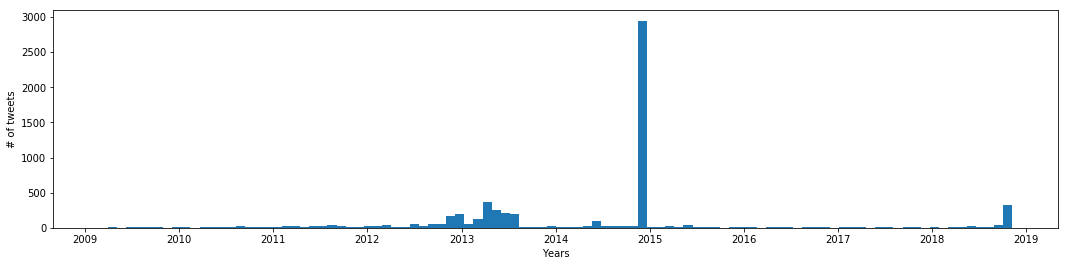

In [29]:
plt.figure(figsize=(18,4))
plt.hist(df_bot_tweets.created_at.sort_values(ascending=False), bins=100)
plt.xlabel('Years')
plt.ylabel('# of tweets')
plt.show()

In [ ]:
# most bot tweets are from 2015 and very few from 2019. The ones from 2019 is mostly from the ones we could access. 

In [38]:
# But anyways, we are going to save this data 
df_bot_tweets.to_csv('Data/Untitled Folder/bot_tweets_past.csv', encoding='utf-8', index=False)


In [2]:
# tweets from the data collected in scripts 2

t_fake_user_1 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/TWT.csv/tweets.csv')



In [3]:
sample = t_fake_user_1.sample(n=50000)

In [9]:
sample.columns

Index(['created_at', 'id', 'text', 'source', 'user_id', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'retweeted_status_id', 'geo', 'place',
       'retweet_count', 'reply_count', 'favorite_count', 'num_hashtags',
       'num_urls', 'num_mentions', 'timestamp'],
      dtype='object')

In [32]:
dcf = sample.groupby(['user_id'],as_index=False)['text', 'timestamp'].head()
print(dcf)

#get 2 largest rows by column C
dcf.timestamp.sort_values()

                                                     text            timestamp
51261   o notebook. ja esta descarregando e to com pre...  2011-12-06 05:08:10
25497   @giveadamnn @Silvannazreineh SHAUSHAUSHAUSHAUS...  2012-02-28 15:51:54
31808   아이폰타이머어플쓰면됨미다^^RT @youngahy: 멀티터치2(sph-m4655)도...  2009-12-23 15:43:09
48191   Deu Brasil no derbi inglês entre Chelsea e M. ...  2011-03-20 20:02:36
88160   RT @Grindei666: купить футболки с логотипом ки...  2013-02-01 15:37:08
97606   Aytekin Gazi Ataş-Seyyah(Yer Gök Aşk) http://t...  2012-05-27 22:23:22
51873        @MairaBenigna tbm to assistindo #FINAESTAMPA  2011-10-26 01:24:36
56992   Нашествие 2012. Электричка до Москвы.  3 день....  2012-07-08 21:12:44
11946   RT @Salute_the_DJ: life is a LOT of things. ea...  2011-09-03 19:05:22
70222         Pharell .... &lt;3 &lt;3 Magnifiqueeeee !!!  2011-07-09 11:52:58
52595                            @IM_Zaya 넵...ㅠㅠ안그를께여...ㅠ  2010-10-05 01:49:34
34284                              http://t.co/N9mzm

'2009-02-24 00:26:02'

In [ ]:
t_fake_user_2 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/fake_followers.csv/tweets.csv')

,created_at,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,timestamp
0,Sat Apr 20 13:19:19 +0000 2013,325599560959393793,https://t.co/iocNIgHxXH. @LovesOfaLDNgirl her...,"<a href=""http://twitter.com/download/iphone"" r...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1,1,2013-04-20 15:19:19
1,Tue Apr 16 19:31:39 +0000 2013,324243711443730434,Well done hubby @Allan_76 http://t.co/AaeTwLucUG,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1,1,2013-04-16 21:31:39
2,Tue Apr 16 17:38:06 +0000 2013,324215137055670274,Two years with my lovely husband - thank you f...,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1,1,2013-04-16 19:38:06
3,Sun Apr 14 15:33:00 +0000 2013,323458877003792386,Sorry bunny about your ears but I was hungry.....,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1,0,2013-04-14 17:33:00
4,Fri Apr 12 15:37:59 +0000 2013,322735354148945920,"Small man, big drink @Allan_76 http://t.co/4NU...","<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,0,1,0,0,1,1,2013-04-12 17:37:59


In [6]:
t_hum1 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/TFP.csv/tweets.csv')
t_hum1.shape
#hum1.isna().sum()

(563693, 19)

In [9]:
#Italian tweets only discard.
#t_hum2 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/E13.csv/tweets.csv')
#t_hum2.shape

(2068037, 19)

In [ ]:
hum3 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/genuine_accounts.csv/u

In [10]:
t_hum3 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/genuine_accounts.csv/tweets.csv')
t_hum3.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2839362, 25)

In [14]:
t_hum3.columns

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')

In [ ]:
t_hum3[[t_hum3.user_id, t_hum3.text]]

In [97]:
hum4 = pd.read_csv('/Users/pbiswas/Desktop/social_honeypot_icwsm_2011/legitimate_users.txt', sep= "\t", header=None)
print(hum4.shape)



(19276, 8)


In [98]:
header = ['bot', 'created_at', 'default_profile', 'default_profile_image',
           'description', 'favourites_count', 'followers_count', 'friends_count',
           'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
           'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
           'verified']
    

In [99]:
hum4.columns = ['id', 'created_at', 'collected_at', 'friends_count', 'followers_count', 'tweet_count', 'len_screen_ame', 'len_description']

In [100]:
hum4.head()

,id,created_at,collected_at,friends_count,followers_count,tweet_count,len_screen_ame,len_description
0,614,2006-07-13 15:30:05,2009-11-20 23:56:21,510,350,3265,10,34
1,1038,2006-07-15 16:12:15,2009-11-16 05:12:11,304,443,4405,7,156
2,1437,2006-07-16 12:29:24,2009-11-16 16:25:12,45,73,725,6,37
3,2615,2006-07-19 23:23:55,2009-11-27 18:34:36,211,230,211,7,0
4,3148,2006-07-26 14:17:22,2009-11-20 17:35:18,7346,7244,11438,8,97


In [96]:
# not using right now as they are just account ids
hum5 = pd.read_csv('/Users/pbiswas/Desktop/varol-2017_dat.txt', header=None)
hum5.shape

(2573, 1)

In [74]:
bot1 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/social_spambots_1.csv/users.csv')
bot2 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/social_spambots_2.csv/users.csv')
bot3 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/social_spambots_3.csv/users.csv')
bot4 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_1.csv/users.csv')
bot5 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_2.csv/users.csv')
bot6 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_3.csv/users.csv')
bot7 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_4.csv/users.csv')
bot8 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/INT.csv/users.csv')
bot9 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/FSF.csv/users.csv')

print(bot1.shape, bot2.shape, bot3.shape, bot4.shape, bot5.shape, bot6.shape, bot7.shape, bot8.shape, bot9.shape )

(991, 41) (3457, 40) (464, 41) (1000, 40) (100, 40) (403, 40) (1128, 40) (1337, 34) (1169, 34)


In [118]:
def createOutput(data):
    
    header = ['bot', 'created_at', 'default_profile', 'default_profile_image',
           'description', 'favourites_count', 'followers_count', 'friends_count',
           'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
           'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
           'verified']
    
    bots = pd.DataFrame(columns=header)
    
    for key in header:
        if key not in data.columns:
            bots[key] = np.NAN
        else:
            bots[key] = data[key]
    
    bots.bot = 1
    #df = pd.DataFrame(d, columns= header, index=np.arange(1))
    # df['bot'] = isbot
    return bots

In [119]:
b1 = createOutput(bot1)
b2 = createOutput(bot2)
b3 = createOutput(bot3)
b4 = createOutput(bot4)
b5 = createOutput(bot5)
b6 = createOutput(bot6)
b7 = createOutput(bot7)
b8 = createOutput(bot8)
b9 = createOutput(bot9)

In [120]:
all_bots = pd.concat([b1, b2, b3, b4, b5, b6, b7, b8, b9], axis=0, ignore_index=True)

In [121]:
all_bots.shape

(10049, 20)

In [122]:
#all_bots.isna().sum()

# will update later for null values 

all_bots.to_csv('Data/all_bots.csv', encoding='utf-8', index=False)

In [123]:
def createOutput(data):
    
    header = ['bot', 'created_at', 'default_profile', 'default_profile_image',
           'description', 'favourites_count', 'followers_count', 'friends_count',
           'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
           'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
           'verified']
    
    hums = pd.DataFrame(columns=header)
    
    for key in header:
        if key not in data.columns:
            hums[key] = np.NAN
        else:
            hums[key] = data[key]
    
    hums.bot = 0
    #df = pd.DataFrame(d, columns= header, index=np.arange(1))
    # df['bot'] = isbot
    return hums

In [124]:
# converting humans data

h1 = createOutput(hum1)
h2 = createOutput(hum2)
h3 = createOutput(hum3)
h4 = createOutput(hum4)

In [125]:
all_hums = pd.concat([h1, h2, h3, h4], axis=0, ignore_index=True)

In [126]:
all_hums.shape

(24700, 20)

In [127]:
h4.head()

,bot,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,has_extended_profile,id,id_str,lang,listed_count,location,name,screen_name,status,statuses_count,url,verified
0,0,2006-07-13 15:30:05,NaN,NaN,NaN,NaN,350,510,NaN,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2006-07-15 16:12:15,NaN,NaN,NaN,NaN,443,304,NaN,1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2006-07-16 12:29:24,NaN,NaN,NaN,NaN,73,45,NaN,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2006-07-19 23:23:55,NaN,NaN,NaN,NaN,230,211,NaN,2615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2006-07-26 14:17:22,NaN,NaN,NaN,NaN,7244,7346,NaN,3148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
all_hums.to_csv('Data/all_hums.csv', encoding='utf-8', index=False)

In [132]:
all_hums.shape

(24700, 20)

In [135]:
hum4

,id,created_at,collected_at,friends_count,followers_count,tweet_count,len_screen_ame,len_description
0,614,2006-07-13 15:30:05,2009-11-20 23:56:21,510,350,3265,10,34
1,1038,2006-07-15 16:12:15,2009-11-16 05:12:11,304,443,4405,7,156
2,1437,2006-07-16 12:29:24,2009-11-16 16:25:12,45,73,725,6,37
3,2615,2006-07-19 23:23:55,2009-11-27 18:34:36,211,230,211,7,0
4,3148,2006-07-26 14:17:22,2009-11-20 17:35:18,7346,7244,11438,8,97
5,5593,2006-09-08 10:58:49,2009-11-24 06:08:27,898,1024,2897,8,56
6,9375,2006-10-18 09:58:09,2009-11-18 04:07:12,53,131,566,9,11
7,10336,2006-10-24 10:05:24,2009-11-17 16:32:35,754,4103,6181,6,0
8,10455,2006-10-25 04:02:13,2009-11-15 02:51:26,140,222,1192,9,15
9,10698,2006-10-26 19:04:29,2009-11-16 02:20:01,140,1329,17457,8,63


In [61]:
bot1.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1'],
      dtype='object')

In [69]:
bot7.lang.value_counts()

en    1128
Name: lang, dtype: int64

In [72]:
hum3.lang.value_counts()

en                    3178
es                     123
en-gb                   50
ja                      32
fr                      18
zh-tw                   17
pt                      13
id                       7
de                       6
nl                       5
ru                       4
en-GB                    4
zh-TW                    3
Select Language...       2
tr                       2
da                       2
ar                       1
pl                       1
ko                       1
el                       1
sv                       1
xx-lc                    1
fil                      1
en-AU                    1
Name: lang, dtype: int64

In [137]:
twt_fake.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,80479674,YI YUAN,yi_twitts,29,19,255,1,0,Wed Oct 07 03:19:21 +0000 2009,http://www.jycondo.com,...,efefef,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-18000.0,NaN,NaN,real estate sales,2015-02-14 09:55:39,TWT
1,82487179,Marcos Perez C,marcos_peca,1408,208,866,138,0,Wed Oct 14 23:40:17 +0000 2009,NaN,...,A0C5C7,http://a0.twimg.com/images/themes/theme6/bg.gif,709397,FF3300,-21600.0,NaN,NaN,NaN,2015-02-14 09:55:39,TWT
2,105830531,curti lorenzo,curtilorenzo,39,59,962,8,0,Sun Jan 17 16:46:52 +0000 2010,http://www.valcavargna.com/,...,C0DFEC,http://a0.twimg.com/profile_background_images/...,022330,0084B4,0.0,NaN,NaN,le corna del capro scappato dal gregge s'infil...,2015-02-14 09:55:39,TWT
3,114488344,ruben dario toscano,gatito2710,59,7,49,4,0,Mon Feb 15 15:49:58 +0000 2010,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,-18000.0,NaN,NaN,NaN,2015-02-14 09:55:39,TWT
4,123222267,Malek Khalaf,MalekKhalaf,987,60,521,61,1,Mon Mar 15 11:38:55 +0000 2010,http://www.facebook.com/Malek.AlBalawi,...,A9A09B,http://a0.twimg.com/profile_background_images/...,D9FBFC,C0C3CC,10800.0,NaN,NaN,"MA student at JU, Interested in Juventus,Italy...",2015-02-14 09:55:39,TWT


In [130]:
ivoted_users.to_csv('users_ivoted.csv', encoding='utf-8', index=False)

In [ ]:
#for col in use.columns:
#    if russ_bots[col].dtypes == 'float64':
#       # russ_bots[col].astype(int)
#        #print('yes', col, russ_bots[col].dtypes)
#        russ_bots[col] = russ_bots[col].astype(int)

In [139]:
# new fake dataset- https://arxiv.org/pdf/1509.04098.pdf

In [138]:
twt_fake = pd.read_csv('/Users/pbiswas/Desktop/cresci-2015.csv/TWT.csv/users.csv')

twt_fake.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,80479674,YI YUAN,yi_twitts,29,19,255,1,0,Wed Oct 07 03:19:21 +0000 2009,http://www.jycondo.com,...,efefef,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-18000.0,NaN,NaN,real estate sales,2015-02-14 09:55:39,TWT
1,82487179,Marcos Perez C,marcos_peca,1408,208,866,138,0,Wed Oct 14 23:40:17 +0000 2009,NaN,...,A0C5C7,http://a0.twimg.com/images/themes/theme6/bg.gif,709397,FF3300,-21600.0,NaN,NaN,NaN,2015-02-14 09:55:39,TWT
2,105830531,curti lorenzo,curtilorenzo,39,59,962,8,0,Sun Jan 17 16:46:52 +0000 2010,http://www.valcavargna.com/,...,C0DFEC,http://a0.twimg.com/profile_background_images/...,022330,0084B4,0.0,NaN,NaN,le corna del capro scappato dal gregge s'infil...,2015-02-14 09:55:39,TWT
3,114488344,ruben dario toscano,gatito2710,59,7,49,4,0,Mon Feb 15 15:49:58 +0000 2010,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,-18000.0,NaN,NaN,NaN,2015-02-14 09:55:39,TWT
4,123222267,Malek Khalaf,MalekKhalaf,987,60,521,61,1,Mon Mar 15 11:38:55 +0000 2010,http://www.facebook.com/Malek.AlBalawi,...,A9A09B,http://a0.twimg.com/profile_background_images/...,D9FBFC,C0C3CC,10800.0,NaN,NaN,"MA student at JU, Interested in Juventus,Italy...",2015-02-14 09:55:39,TWT


In [140]:
twt_fake.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')

In [ ]:
['bot', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
       'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
       'verified']

In [142]:
#def createOutput(data):
header = ['bot', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
       'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
       'verified']
fake_users = pd.DataFrame(columns=header)
for key in header:
    if key not in twt_fake.columns:
        fake_users[key] = ""
    else:
        fake_users[key] = twt_fake[key]

#df = pd.DataFrame(d, columns= header, index=np.arange(1))
# df['bot'] = isbot
#return df

In [143]:
fake_users

,bot,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,has_extended_profile,id,id_str,lang,listed_count,location,name,screen_name,status,statuses_count,url,verified
0,NaN,Wed Oct 07 03:19:21 +0000 2009,NaN,NaN,real estate sales,1,19,255,,80479674,,en,0,toronto,YI YUAN,yi_twitts,,29,http://www.jycondo.com,NaN
1,NaN,Wed Oct 14 23:40:17 +0000 2009,NaN,NaN,NaN,138,208,866,,82487179,,es,0,NaN,Marcos Perez C,marcos_peca,,1408,NaN,NaN
2,NaN,Sun Jan 17 16:46:52 +0000 2010,NaN,NaN,le corna del capro scappato dal gregge s'infil...,8,59,962,,105830531,,it,0,San Bartolomeo Val Cavargna CO,curti lorenzo,curtilorenzo,,39,http://www.valcavargna.com/,NaN
3,NaN,Mon Feb 15 15:49:58 +0000 2010,1.0,NaN,NaN,4,7,49,,114488344,,es,0,peru,ruben dario toscano,gatito2710,,59,NaN,NaN
4,NaN,Mon Mar 15 11:38:55 +0000 2010,NaN,NaN,"MA student at JU, Interested in Juventus,Italy...",61,60,521,,123222267,,en,1,"31.975193,35.920294",Malek Khalaf,MalekKhalaf,,987,http://www.facebook.com/Malek.AlBalawi,NaN
5,NaN,Sun May 16 19:51:50 +0000 2010,1.0,NaN,Con Dios no necesito nada mas el es mi fortaleza,3,141,1075,,144602443,,es,0,Santo domingo,ruthyohannadelarosa,ruthyohanna,,286,NaN,NaN
6,NaN,Sun Nov 07 15:13:37 +0000 2010,1.0,NaN,NaN,0,16,342,,212958140,,es,1,Argentina,Julieta Analia Perez,July_pz,,45,NaN,NaN
7,NaN,Wed Apr 06 15:35:32 +0000 2011,1.0,NaN,NaN,0,14,287,,278082770,,es,0,NaN,carlosjaviervega,bevega,,72,NaN,NaN
8,NaN,Sun Sep 04 09:54:29 +0000 2011,1.0,NaN,NaN,0,0,122,,367651000,,it,0,NaN,Giampaolo Taddei,giatadde,,1,NaN,NaN
9,NaN,Tue Jun 05 01:12:01 +0000 2012,1.0,NaN,NaN,0,4,228,,599789901,,ar,0,NaN,Ahmed Mohamed,212Amhemd,,0,NaN,NaN


In [144]:
fake_users.dtypes

bot                       object
created_at                object
default_profile          float64
default_profile_image    float64
description               object
favourites_count           int64
followers_count            int64
friends_count              int64
has_extended_profile      object
id                         int64
id_str                    object
lang                      object
listed_count               int64
location                  object
name                      object
screen_name               object
status                    object
statuses_count             int64
url                       object
verified                 float64
dtype: object

In [147]:
fake_users.isna().sum()

bot                        0
created_at                 0
default_profile          311
default_profile_image    843
description              627
favourites_count           0
followers_count            0
friends_count              0
has_extended_profile       0
id                         0
id_str                     0
lang                       0
listed_count               0
location                 500
name                       0
screen_name                0
status                     0
statuses_count             0
url                      744
verified                 845
dtype: int64

In [146]:
fake_users.bot = 1

In [154]:
fake_users.default_profile = fake_users.default_profile.fillna(0)
fake_users.default_profile = fake_users.default_profile.astype(int)

In [155]:
fake_users.default_profile.value_counts()

1    534
0    311
Name: default_profile, dtype: int64

In [157]:
fake_users.default_profile_image = fake_users.default_profile_image.fillna(0)
fake_users.default_profile_image = fake_users.default_profile_image.astype(int)

fake_users.default_profile_image.value_counts()

0    843
1      2
Name: default_profile_image, dtype: int64

In [160]:
fake_users.description = fake_users.description.fillna('No description')
fake_users.location = fake_users.location.fillna('No location')

In [165]:
fake_users.url = fake_users.url.fillna('No url')

In [167]:

fake_users.to_csv('fake_users_.csv', encoding='utf-8', index=False)

In [170]:
# second fake dataset to balance samples 
# This dataset is from Contact: http://mib.projects.iit.cnr.it/dataset.html  crn 2017 dataset
# more data - https://botometer.iuni.iu.edu/bot-repository/datasets.html

twt_fake_2017 = pd.read_csv('/Users/pbiswas/Desktop/cresci-2017.csv/datasets_full.csv/fake_followers.csv/users.csv')

twt_fake_2017.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,updated
0,80479674,YI YUAN,yi_twitts,29,19,255,1,0,Wed Oct 07 03:19:21 +0000 2009,http://www.jycondo.com,...,-18000.0,NaN,NaN,NaN,NaN,NaN,real estate sales,NaN,NaN,2013-06-12 18:38:35
1,82487179,Marcos Perez C,marcos_peca,1408,208,866,138,0,Wed Oct 14 23:40:17 +0000 2009,NaN,...,-21600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-12 18:38:35
2,105830531,curti lorenzo,curtilorenzo,39,59,962,8,0,Sun Jan 17 16:46:52 +0000 2010,http://www.valcavargna.com/,...,0.0,NaN,NaN,NaN,NaN,NaN,le corna del capro scappato dal gregge s'infil...,NaN,NaN,2013-06-12 18:38:35
3,114488344,ruben dario toscano,gatito2710,59,7,49,4,0,Mon Feb 15 15:49:58 +0000 2010,NaN,...,-18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-12 18:38:35
4,123222267,Malek Khalaf,MalekKhalaf,987,60,521,61,1,Mon Mar 15 11:38:55 +0000 2010,http://www.facebook.com/Malek.AlBalawi,...,10800.0,NaN,NaN,NaN,NaN,NaN,"MA student at JU, Interested in Juventus,Italy...",NaN,NaN,2013-06-11 17:39:44


In [171]:
# matching with existing dataset

#def createOutput(data):
header = ['bot', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
       'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
       'verified']
fake_users_2017 = pd.DataFrame(columns=header)
for key in header:
    if key not in twt_fake_2017.columns:
        fake_users_2017[key] = ""
    else:
        fake_users_2017[key] = twt_fake_2017[key]

#df = pd.DataFrame(d, columns= header, index=np.arange(1))
# df['bot'] = isbot
#return df

In [172]:
fake_users_2017

,bot,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,has_extended_profile,id,id_str,lang,listed_count,location,name,screen_name,status,statuses_count,url,verified
0,NaN,Wed Oct 07 03:19:21 +0000 2009,NaN,NaN,real estate sales,1,19,255,,80479674,,en,0,toronto,YI YUAN,yi_twitts,,29,http://www.jycondo.com,NaN
1,NaN,Wed Oct 14 23:40:17 +0000 2009,NaN,NaN,NaN,138,208,866,,82487179,,es,0,NaN,Marcos Perez C,marcos_peca,,1408,NaN,NaN
2,NaN,Sun Jan 17 16:46:52 +0000 2010,NaN,NaN,le corna del capro scappato dal gregge s'infil...,8,59,962,,105830531,,it,0,San Bartolomeo Val Cavargna CO,curti lorenzo,curtilorenzo,,39,http://www.valcavargna.com/,NaN
3,NaN,Mon Feb 15 15:49:58 +0000 2010,1.0,NaN,NaN,4,7,49,,114488344,,es,0,peru,ruben dario toscano,gatito2710,,59,NaN,NaN
4,NaN,Mon Mar 15 11:38:55 +0000 2010,NaN,NaN,"MA student at JU, Interested in Juventus,Italy...",61,60,521,,123222267,,en,1,"31.975193,35.920294",Malek Khalaf,MalekKhalaf,,987,http://www.facebook.com/Malek.AlBalawi,NaN
5,NaN,Sun May 16 19:51:50 +0000 2010,1.0,NaN,Con Dios no necesito nada mas el es mi fortaleza,3,141,1075,,144602443,,es,0,Santo domingo,ruthyohannadelarosa,ruthyohanna,,286,NaN,NaN
6,NaN,Sun Nov 07 15:13:37 +0000 2010,1.0,NaN,NaN,0,16,342,,212958140,,es,1,Argentina,Julieta Analia Perez,July_pz,,45,NaN,NaN
7,NaN,Wed Apr 06 15:35:32 +0000 2011,1.0,NaN,NaN,0,14,287,,278082770,,es,0,NaN,carlosjaviervega,bevega,,72,NaN,NaN
8,NaN,Sun Sep 04 09:54:29 +0000 2011,1.0,NaN,NaN,0,0,122,,367651000,,it,0,NaN,Giampaolo Taddei,giatadde,,1,NaN,NaN
9,NaN,Thu Sep 08 13:20:35 +0000 2011,NaN,NaN,NaN,16,4,588,,370098498,,en,0,NaN,pirfectmoses,pirfectmoses,,24,NaN,NaN


In [179]:
fake_users_2017.bot = 1

fake_users_2017.default_profile = fake_users_2017.default_profile.fillna(0).astype(int)
fake_users_2017.default_profile = fake_users_2017.default_profile

fake_users_2017.default_profile_image = fake_users_2017.default_profile_image.fillna(0)
fake_users_2017.default_profile_image = fake_users_2017.default_profile_image.astype(int)
fake_users_2017.description = fake_users_2017.description.fillna('No description')
fake_users_2017.location = fake_users_2017.location.fillna('No location')
fake_users_2017.url = fake_users_2017.url.fillna('No url')

In [180]:
fake_users_2017.isna().sum()

bot                         0
created_at                  0
default_profile             0
default_profile_image       0
description                 0
favourites_count            0
followers_count             0
friends_count               0
has_extended_profile        0
id                          0
id_str                      0
lang                        0
listed_count                0
location                    0
name                        0
screen_name                 0
status                      0
statuses_count              0
url                         0
verified                 3351
dtype: int64

In [182]:
fake_users_2017.to_csv('fake_users_2.csv', encoding='utf-8', index=False)

In [15]:
for user in users:
    print(user.name)
    
    for tweet in tweepy.Cursor(api.search,q="#unitedAIRLINES",count=100,
                           lang="en",
                           since="2017-04-03").items():
    print (tweet.created_at, tweet.text)

Tara Dublin #IVoted 🌊
Kavin #IVoted
#iVoted
Tim “#IVoted - Have You Voted?” Bond
Nadine van der Velde
#IVoted
Rafe 🇺🇸 #VOTE! Nov 6th
Samira Tu'Ala #IVoted
r🎃gue1 #IVoted
MAGA! 1 DAY @ A TIME
fl_brooke #gobolts #IVoted
#IVoted! Shad Clark
Rob Dexter
Hispanic! At The Disco #ivoted
I Voted Remain 🇪🇺 #StopBrexit #FBPE #PeoplesVote
iVoted
I Voted
Sudie
Nigel Huckle
Hope Made Human


In [5]:
real_users = []
for user in tweepy.Cursor(api.get_user, screen_name="verified").items():  #'friends are the accounts that @verified follows and are verified'
    verified_screen_names.append(user.screen_name)
    print('friend: ' + user.screen_name, user.verified)
